In [19]:
import pandas as pd
%matplotlib inline

In [2]:
unames = ["user_id","gender","age","occupation","zip"]

In [3]:
movies = pd.read_csv("ml-20m/movies.csv")
ratings = pd.read_csv("ml-20m/ratings.csv")

In [4]:
#movies.head()
#ratings.head()
#ratings.describe()
#movies.describe()

In [5]:
fantasy = movies[movies["genres"].str.contains("Fantasy")]

In [6]:
#fantasy.head()
#fantasy.shape

In [7]:
data = pd.merge(movies, ratings)

In [8]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [9]:
fantasy = data[data["genres"].str.contains("Fantasy")]

In [10]:
#fantasy.head()
#fantasyRatings = pd.DataFrame()
#fantasyRatings["movieId"] = fantasy["movieId"].unique()
#fantasyRatings["title"] = fantasy["title"].unique()
#fantasyRatings.head()
#df = fantasy.groupby(['movieId', 'rating']).sum()
#df.head(5)
#fantasy.dropna()
#fantasy.fillna(0)
#fantasyRatings["ratings"] = fantasy.groupby("movieId")["rating"].mean()
#fantasyRatings.head(30)

In [11]:
fantasy1 = fantasy.groupby("title")["rating"].mean()
#fantasy1.head()

In [12]:
fantasyRatings = pd.concat([fantasy1,fantasy['title'].value_counts()], axis = 1, sort= False)
#fantasyRatings.head()

In [13]:
fantasyRatings = fantasyRatings.sort_values(by = 'title', ascending = False)
#fantasyRatings.head()

In [14]:
fantasyRatings = fantasyRatings.rename(columns = {"rating": "Average Rating","title": "Total Ratings"})
#fantasyRatings.head()

In [15]:
fantasyRatings = fantasyRatings[fantasyRatings["Total Ratings"] >= 2000]
fantasyRatings = fantasyRatings.sort_values(by = "Average Rating", ascending = False)
fantasyRatings.head()

,Average Rating,Total Ratings
Spirited Away (Sen to Chihiro no kamikakushi) (2001),4.203810,13466
"Princess Bride, The (1987)",4.176732,32586
Monty Python and the Holy Grail (1975),4.174146,33024
My Neighbor Totoro (Tonari no Totoro) (1988),4.149481,5489
"Lord of the Rings: The Return of the King, The (2003)",4.142382,31577


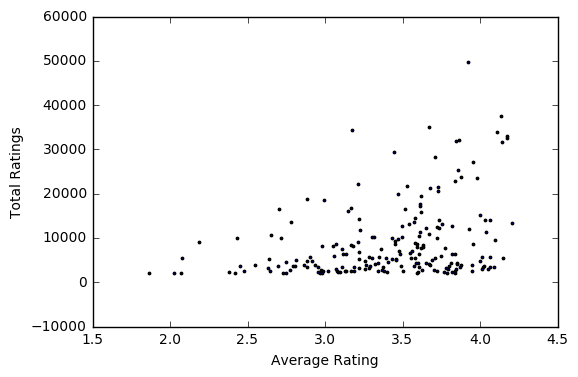

In [30]:
fantasyRatings.plot.scatter("Average Rating", "Total Ratings", s = 3)
fantasyRatings.plot.scatter("Average Rating", "Total Ratings", s = 3)